## Chapter 5
### This notebook and the figures below are made by Yeseul Lee, under the guidance of Steven Skiena.

In [1]:
import numpy as np
import math
import random
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import colors
from scipy import stats

%matplotlib inline

### Figure 5.2 Left - Binomial distribution of coin flips
#### Probability of number of heads if a coin is tossed 200 numbers (p=0.5)

(65, 135)

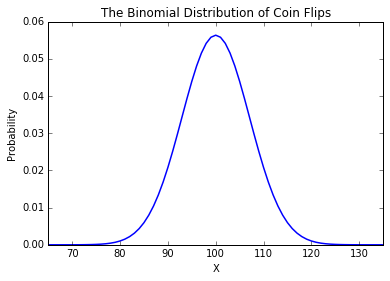

In [2]:
n = 200
p = 0.5
x = np.arange(stats.binom.ppf(0.000000001, n, p), stats.binom.ppf(0.999999999, n, p))
plt.plot(x, stats.binom.pmf(x, n, p), linewidth="1.5")
plt.xlabel("X")
plt.ylabel("Probability")
plt.title("The Binomial Distribution of Coin Flips")
plt.xlim(65,135)

### Figure 5.2 Right
#### Probablity of a number of lightbulb burnouts (p=0.001) after 1000 events


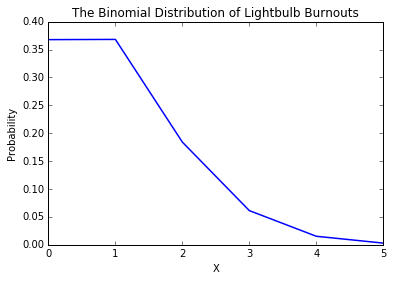

In [3]:
n = 1000
p = 0.001
x = np.arange(stats.binom.ppf(0.0000000000000001, n, p), stats.binom.ppf(0.999999999999999999, n, p))
plt.plot(x, stats.binom.pmf(x, n, p), linewidth="1.5")
plt.xlabel("X")
plt.xlim(0,5)
plt.ylabel("Probability")
plt.title("The Binomial Distribution of Lightbulb Burnouts")

### Figure 5.3
#### Reference http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.stats.norm.html

(-3.5, 3.5)

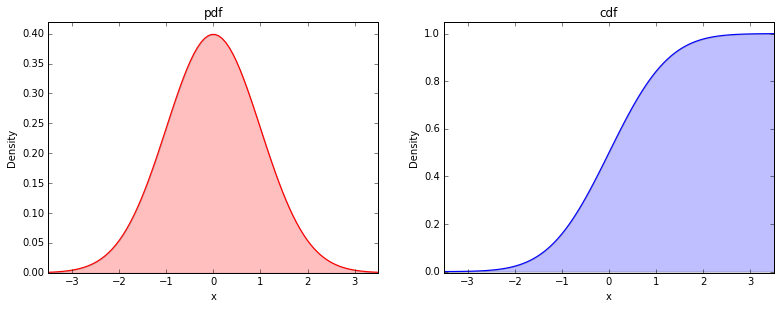

In [4]:
plt.figure(figsize=(13,4.5))

# LEFT PLOT
plt.subplot(121)
x = np.linspace(stats.norm.ppf(0.0001), stats.norm.ppf(0.9999), 100)
plt.plot(x, stats.norm.pdf(x), 'r-', linewidth=1.2)
plt.fill_between(x, stats.norm.pdf(x), facecolor='red', alpha=0.25)
plt.xlabel('x')
plt.ylabel('Density')
plt.title("pdf")
plt.ylim(0,0.42)
plt.xlim(-3.5, 3.5)

# RIGHT PLOT
plt.subplot(122)
plt.plot(x, stats.norm.cdf(x), 'b-', linewidth=1.2)
plt.fill_between(x, stats.norm.cdf(x), facecolor='blue', alpha=0.25)
plt.xlabel('x')
plt.ylabel('Density')
plt.title("cdf")
plt.ylim(-0.005,1.05)
plt.xlim(-3.5, 3.5)

### Figure 5.4 - Normal distribution

[]

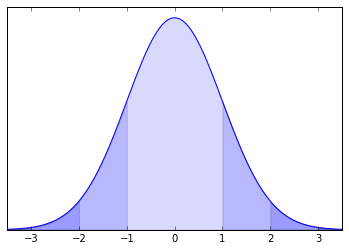

In [5]:
# Note: stats.norm.pdf(x, mean, stdev)

x = np.linspace(stats.norm.ppf(0.00000000001), stats.norm.ppf(0.99999999999), 100000)
mean = 0
sigma = 1
pdf = stats.norm.pdf(x, mean, sigma)
plt.plot(x, pdf, 'b-')

plt.fill_between(x, pdf, alpha=0.15)
plt.fill_between(x, pdf, where=( x <-3*sigma), alpha=0.15)
plt.fill_between(x, pdf, where=( x <-2*sigma), alpha=0.15)
plt.fill_between(x, pdf, where=( x <-1*sigma), alpha=0.15)
plt.fill_between(x, pdf, where=( x > 3*sigma), alpha=0.15)
plt.fill_between(x, pdf, where=( x > 2*sigma), alpha=0.15)
plt.fill_between(x, pdf, where=( x > 1*sigma), alpha=0.15)

plt.ylim(0, 0.42)
plt.xlim(-3.5, 3.5)

#Hide y axis
plt.gca().axes.get_yaxis().set_ticks([])

### Figure 5.5
#### Plot the Poisson distribution for mu=1000

(850, 1150)

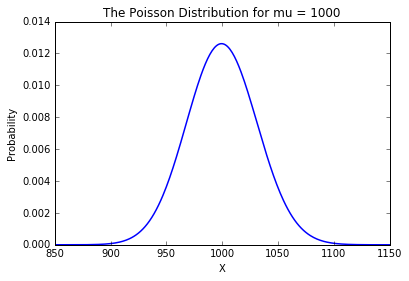

In [6]:
mu = 1000
x = np.arange(stats.poisson.ppf(0.0000001, mu), stats.poisson.ppf(0.9999999, mu))
plt.plot(x, stats.poisson.pmf(x, mu), linewidth="1.5")
plt.xlabel("X")
plt.ylabel("Probability")
plt.title("The Poisson Distribution for mu = 1000")
plt.xlim(850, 1150)

### Figure 5.8

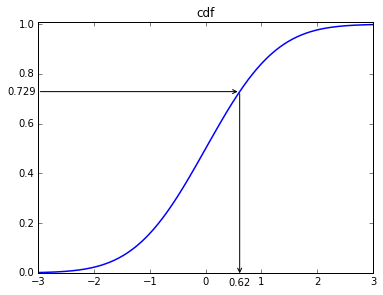

In [7]:
x = np.linspace(stats.norm.ppf(0.00000001), stats.norm.ppf(0.99999999), 1000)

plt.figure(figsize=(6,4.5))
plt.plot(x, stats.norm.cdf(x), linewidth=1.5)

ax = plt.axes()
input_y = 0.729
input_x = stats.norm.ppf(input_y)

#line input_y
ax.annotate("0.729",
            xy=(input_x, input_y), xycoords='data',
            xytext=(-3.3, input_y), textcoords='data',
            ha="center", va="center",
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3")
            )
#line input_x
ax.annotate("0.62",
            xy=(input_x, input_y), xycoords='data',
            xytext=(input_x, -0.04), textcoords='data',
            ha="center", va="center",
            arrowprops=dict(arrowstyle="<-",
                            connectionstyle="arc3")
            )

plt.ylim(0,1.01)
plt.xlim(-3,3)
plt.title('cdf')

### Figure 5.9 Left - Random sampling from circle

(-1.01, 1.01, -1.01, 1.01)

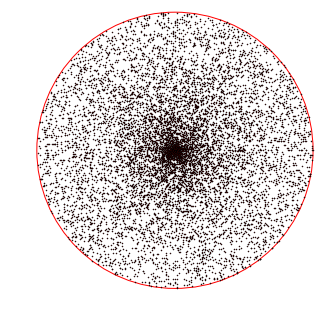

In [8]:
#10,000 points

x = []
y = []
n = 10000

while len(x) < n:
    radius = random.random()
    angle = random.randint(0,360)
    r = math.radians(angle)
    x.append(radius*math.cos(r))
    y.append(radius*math.sin(r))
    
plt.figure(figsize=(5,5))
plt.xlim(-1.01, 1.01)
plt.ylim(-1.01, 1.01)
circle = plt.Circle((0,0), 1, color='r', fill=False)

ax = plt.gca()
ax.add_artist(circle)
ax.plot(x,y, 'ro', markersize = 1)
ax.axis('off')

### Figure 5.9 Right - Uniform sampling

(-1.01, 1.01, -1.01, 1.01)

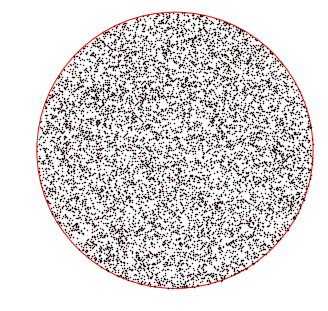

In [9]:
x = []
y = []
n = 10000
while len(x) < n:
    px = random.uniform(-1, 1)
    py = random.uniform(-1, 1)
    if math.sqrt(px*px + py*py) <= 1:
        x.append(px)
        y.append(py)

plt.figure(figsize=(5,5))
plt.xlim(-1.01, 1.01)
plt.ylim(-1.01, 1.01)
circle = plt.Circle((0,0), 1, color='r', fill=False)

ax = plt.gca()
ax.add_artist(circle)
ax.plot(x,y, 'ro', markersize = 1)
ax.axis("off")

### Figure 5.11 Left - Decreasing Difference in means

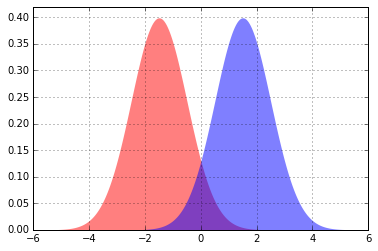

In [10]:
# Note: stats.norm.pdf(x, mean, stdev)

mean = 0
diff = 1.5
std = 1

x = np.linspace(stats.norm.ppf(0.00000000001), stats.norm.ppf(0.99999999999), 100000)
y1 = stats.norm.pdf(x, mean-diff, std)
y2 = stats.norm.pdf(x, mean+diff, std)
plt.fill_between(x, y1, facecolor='red', interpolate= True, linewidth=0, alpha=0.5)
plt.fill_between(x, y2,facecolor='blue', interpolate= True, linewidth=0, alpha=0.5)

plt.ylim(0, 0.42)
plt.xlim(-6, 6)
plt.grid()

### Figure 5.11 Middle

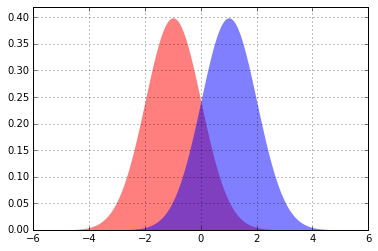

In [11]:
mean = 0
diff = 1
std = 1

x = np.linspace(stats.norm.ppf(0.00000000001), stats.norm.ppf(0.99999999999), 100000)
y1 = stats.norm.pdf(x, mean-diff, std)
y2 = stats.norm.pdf(x, mean+diff, std)
plt.fill_between(x, y1, facecolor='red', interpolate= True, linewidth=0, alpha=0.5)
plt.fill_between(x, y2,facecolor='blue', interpolate= True, linewidth=0, alpha=0.5)

plt.ylim(0, 0.42)
plt.xlim(-6, 6)
plt.grid()

### Figure 5.11 Right

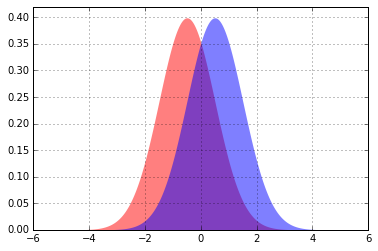

In [12]:
mean = 0
diff = 0.5
std = 1

x = np.linspace(stats.norm.ppf(0.00000000001), stats.norm.ppf(0.99999999999), 100000)
y1 = stats.norm.pdf(x, mean-diff, std)
y2 = stats.norm.pdf(x, mean+diff, std)
plt.fill_between(x, y1, facecolor='red', interpolate= True, linewidth=0, alpha=0.5)
plt.fill_between(x, y2,facecolor='blue', interpolate= True, linewidth=0, alpha=0.5)

plt.ylim(0, 0.42)
plt.xlim(-6, 6)
plt.grid()

### Figure 5.12 Left - Increasing variance

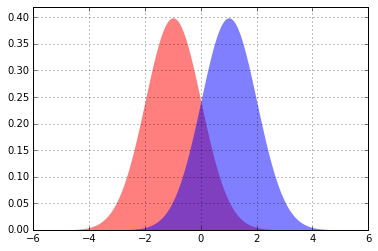

In [13]:
mean = 0
std = 1

x = np.linspace(stats.norm.ppf(0.00000000001), stats.norm.ppf(0.99999999999), 100000)
y1 = stats.norm.pdf(x, mean-1, std)
y2 = stats.norm.pdf(x, mean+1, std)
plt.fill_between(x, y1, facecolor='red', interpolate= True, linewidth=0, alpha=0.5)
plt.fill_between(x, y2,facecolor='blue', interpolate= True, linewidth=0, alpha=0.5)

plt.ylim(0, 0.42)
plt.xlim(-6, 6)
plt.grid()

### Figure 5.12 Middle

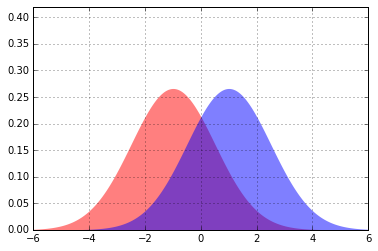

In [14]:
mean = 0
std = 1.5

y1 = stats.norm.pdf(x, mean-1, std)
y2 = stats.norm.pdf(x, mean+1, std)
plt.fill_between(x, y1, facecolor='red', interpolate= True, linewidth=0, alpha=0.5)
plt.fill_between(x, y2,facecolor='blue', interpolate= True, linewidth=0, alpha=0.5)

plt.ylim(0, 0.42)
plt.xlim(-6, 6)
plt.grid()

### Figure 5.12 Right

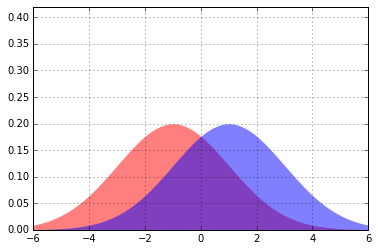

In [15]:
mean = 0
std = 2

y1 = stats.norm.pdf(x, mean-1, std)
y2 = stats.norm.pdf(x, mean+1, std)
plt.fill_between(x, y1, facecolor='red', interpolate= True, linewidth=0, alpha=0.5)
plt.fill_between(x, y2,facecolor='blue', interpolate= True, linewidth=0, alpha=0.5)

plt.ylim(0, 0.42)
plt.xlim(-6, 6)
plt.grid()

### For Figure 5.13, I made these functions.

In [16]:
# A function to find the min and max X of two lists
def findMinMaxX(L1, L2):    
    minX = min(min(L1), min(L2))
    maxX = max(max(L1), max(L2))
    return minX, maxX

# A function to find the maximum difference of elements of same index in two lists.
def maxDifference(L1, L2, numBins):
    maxDiff = 0
    index = 0
    for i in range(0, numBins):
        diff = abs(L1[i]-L2[i])
        if  diff > maxDiff:
            maxDiff = diff
            index = i
    return maxDiff, index

### Figure 5.13 Left - Kolmogorov-Smirnov test

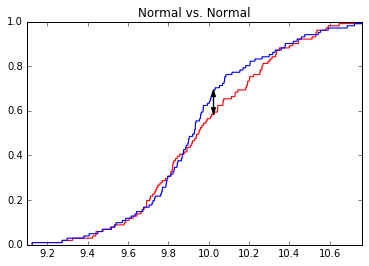

In [17]:
mu = 10
sigma = 0.3 
N = 100

np.random.seed(3)
s = np.random.normal(mu, sigma, N)
np.random.seed(31)
s2 = np.random.normal(mu, sigma, N)

nX, mX = findMinMaxX(s, s2)
newS = np.append(s, [mX]) #add the max
newS2 = np.append(s2, [nX]) #add the min

nbins = 10000

#Graph the two cumulative histograms
n1, bins1, patches1 = plt.hist(newS, nbins, normed=True, cumulative=True, histtype='step', color='red', linewidth='1.1')
n2, bins2, patches2 = plt.hist(newS2, nbins, normed=True, cumulative=True, histtype='step', color='blue', linewidth='1.1')
center = (bins1[:-1] + bins1[1:]) / 2

#Finding the max difference and its index.
maxn, index = maxDifference(n1, n2, nbins)
    
#The x and y axis and the title
plt.ylim(0,0.999)
plt.xlim(9.1,10.76)
plt.title("Normal vs. Normal")

#The arrow of max difference
plt.arrow(center[index], n1[index], 0, maxn, length_includes_head=True, color='black')
plt.arrow(center[index], n2[index], 0, -maxn, length_includes_head=True, color='black')

### Figure 5.13 Right
#### Normal vs. Uniform distribution and their maximum difference.

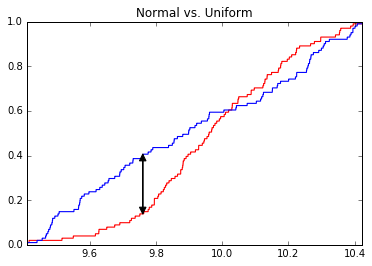

In [18]:
np.random.seed(3)
s = np.random.normal(10, 0.2,100)
s2 = np.random.uniform(9.41, 10.43, 100)

nX, mX = findMinMaxX(s, s2)
newS = np.append(s, [nX])
newS2 = np.append(s2, [mX])

nbins = 10000
n1, bins1, patches1 = plt.hist(newS, nbins, normed=True, cumulative=True, histtype='step', color='red', linewidth='1.1')
n2, bins2, patches2 = plt.hist(newS2, nbins, normed=True, cumulative=True, histtype='step', color='blue', linewidth='1.1')
center = (bins1[:-1] + bins1[1:]) / 2

maxn, index = maxDifference(n1, n2, nbins)

# The x and y axis range and the title
plt.ylim(0,1)
plt.xlim(nX,mX-0.01)
plt.title("Normal vs. Uniform")

# The arrow of max difference
plt.arrow(center[index],n1[index], 0, maxn, length_includes_head=True, color='black')
plt.arrow(center[index],n2[index], 0, -maxn, length_includes_head=True, color='black')

### Figure 5.14

(-10, 220)

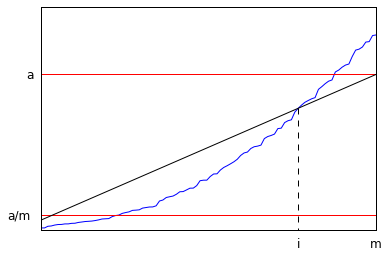

In [19]:
plt.figure(figsize=(6,4))

# Generating points for the blue line.
random.seed(13)
x = np.linspace(0,30,100)
prev = -10
y = []
for i in x:
    j = i*i/4.4 + 10*random.uniform(0,1) -15
    while j < prev: #for monotonically increasing.
        j = i*i/4.4 + 10*random.uniform(0,1) -15
    y.append(j)
    prev = j

alpha = 150
m = 30

#Finding the index of the intersecting point of black and blue lines.
z = 0
for i in range(0,len(x)):
    if abs(y[i] - alpha/float(m) * x[i]) < 1:
        z = i
        
# The blue line
plt.plot(x,y, 'b-')
# y = a
plt.plot(x,len(x)*[alpha], 'r-')
# y = a/m
plt.plot(x,len(x)*[alpha/float(m)], 'r-')
# The black line. y = (a/m)*x
plt.plot(x, (alpha/float(m)) * x, 'k-')
#The intersection.
plt.plot([x[z], x[z]], [y[z], -20], 'k--')

plt.text(-1, alpha, 'a', fontsize=12, verticalalignment='center', horizontalalignment='center')
plt.text(-2, alpha/float(m), "a/m", fontsize=12, verticalalignment='center', horizontalalignment='center')
plt.text(m,-25, "m", fontsize=12, verticalalignment='center', horizontalalignment='center')
plt.text(x[z],-25, "i", fontsize=12, verticalalignment='center', horizontalalignment='center')

plt.gca().axes.get_xaxis().set_ticks([])
plt.gca().axes.get_yaxis().set_ticks([])

plt.ylim(-10,220)

### For Figure 5.15
#### Data Source: https://www.statcrunch.com/app/index.php?dataid=1406047

In [20]:
# Preparing Data
path = "/home/yeseul/practice-notebook/weight.xls"
data = pd.ExcelFile(path).parse('Sheet1')
men = data[(data['Gender'] == 1) & (data['Age'] <=260)]
men = pd.DataFrame(men)

women = data[(data['Gender'] == 0) & (data['Age'] <=260)]
women = pd.DataFrame(women)

menh = men['Height'].sort_values(ascending=False)
womenh = women['Height'].sort_values(ascending=False)

x = []
minh = min(min(menh), min(womenh))
# men is 1, women is 0
for i in menh:
    x.append((1, i-minh))
for i in womenh:
    x.append((0, i-minh))
x = np.array(x)

### Figure 5.15 Left - Data shown using colormap

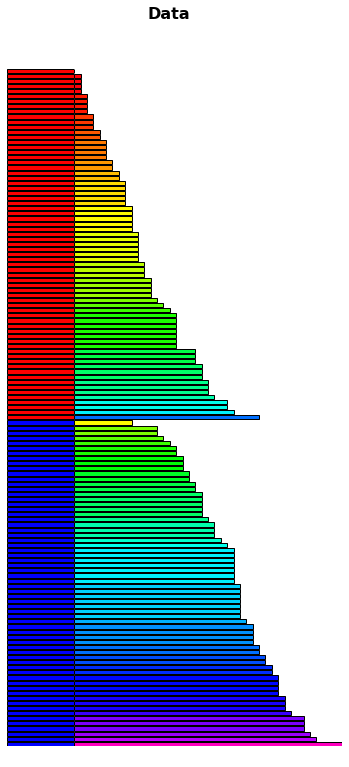

In [21]:
# Color map
cmap=plt.get_cmap('gist_rainbow')

# Use 0-1 values to generate the colors with the linspace method
line_colors = cmap(np.linspace(0,1,max(x[:,1])+1))

fig = plt.figure(figsize=(6,12))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 4]) 

# This is for the left bar.
clst = []
for i in x:
    if i[0] == 0:
        clst.append('red')
    else:
        clst.append('blue')
        
ax = plt.subplot(gs[0])
plt.barh(range(len(x)), [1]*len(x), color = clst)
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.ylim(0,len(x))
plt.axis('off')

# This is for the right bar.
ax = plt.subplot(gs[1])
plt.barh(range(len(x)), [i[1] for i in x], color = [line_colors[i] for i in x[:,1]])
ax.set_xlim(0,max([i[1] for i in x]))
plt.ylim(0,len(x))
ax.set_yticklabels([])
plt.axis('off')

plt.subplots_adjust(wspace = 0, hspace = 0)
plt.subplots_adjust(top=0.91)
plt.suptitle("Data", fontsize=16, fontweight='bold')

### For Figure 5.15 Middle, Randomizing function

In [22]:
def randomize(a):
    n = len(a)
    for i in range(0, n):
        #swap a[i] and a[random[i,n]]
        midval = a[i]
        k = np.random.randint(i, n, size = 1) # returns a list
        a[i] = a[k[0]]
        a[k] = midval

### Figure 5.15 Middle - Shuffled Data

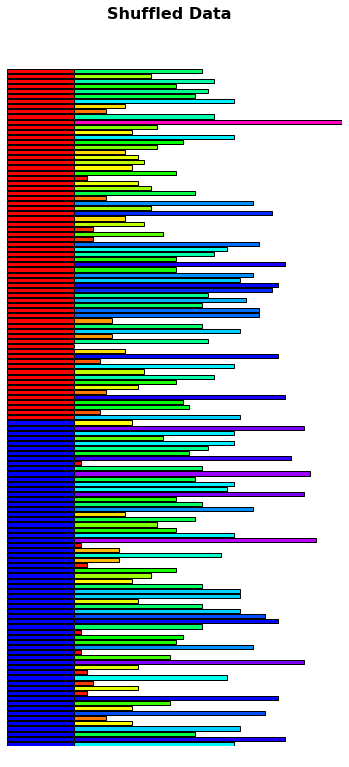

In [23]:
plt.figure(figsize=(6,12))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 4]) 

#randomize second colulmn.
randomize(x[:,1])

clst = []
for i in x[:,0]:
    if i == 0:
        clst.append('red')
    else:
        clst.append('blue')
        
ax = plt.subplot(gs[0])
plt.barh(range(len(x)), [1]*len(x), color = clst)
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.ylim(0,len(x))
plt.axis('off')

ax = plt.subplot(gs[1])
plt.barh(range(len(x)), x[:,1], color = [line_colors[i] for i in x[:,1]])
ax.set_xlim(0,max(x[:,1]))
ax.set_yticklabels([])
plt.ylim(0,len(x))
plt.axis('off')

plt.subplots_adjust(wspace = 0, hspace = 0, top=0.91)
plt.suptitle("Shuffled Data", fontsize=16, fontweight="bold")

### Figure 5.15 Right - Ordered Shuffles

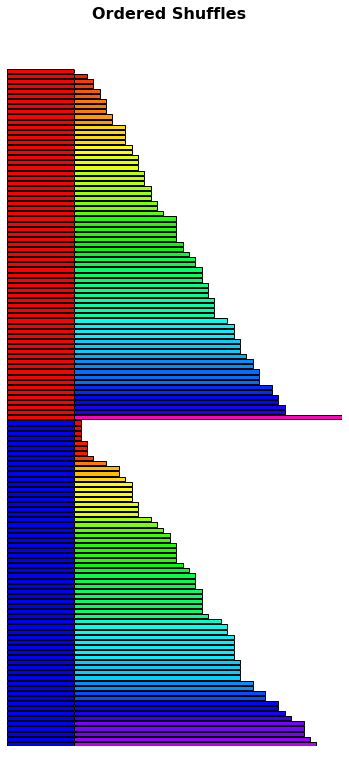

In [24]:
#sort by 1st column
a = x[x[:,1].argsort()]

#sort by 0th column
a = a[a[:,0].argsort(kind='mergesort')]

#reverse
k = a[::-1]

#sort the second column within each gender.
plt.figure(figsize=(6,12))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 4]) 

ax = plt.subplot(gs[0])
plt.barh(range(len(k)), [1]*len(k), color = clst)
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.ylim(0,len(k))
plt.axis('off')

ax = plt.subplot(gs[1])
plt.barh(range(len(k)), k[:,1], color = [line_colors[i] for i in k[:,1]])
ax.set_xlim(0,max(k[:,1]))
ax.set_yticklabels([])
plt.ylim(0,len(k))
plt.axis('off')

plt.subplots_adjust(wspace = 0, hspace = 0, top=0.91)
plt.suptitle('Ordered Shuffles', fontsize=16, fontweight='bold')

### Figure 5.16 Left

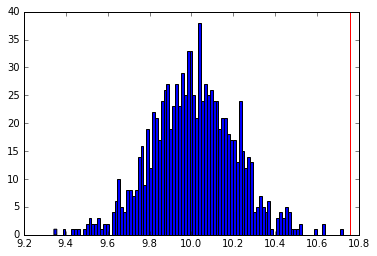

In [25]:
np.random.seed(5)
x = np.random.normal(10, 0.2, 1000)
nbins = 100
n, bins, patches = plt.hist(x, nbins)
plt.vlines(10.76, 0, 40, color='red') #about 105th

### Figure 5.16 Right

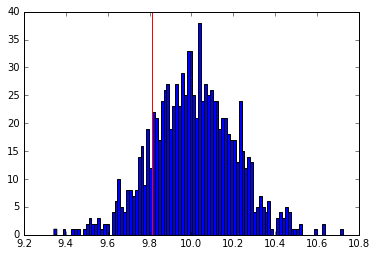

In [26]:
np.random.seed(5)
x = np.random.normal(10, 0.2, 1000)
nbins = 100
n, bins, patches = plt.hist(x, nbins)
plt.vlines(9.81,0,40, color='red') #about 43rd percentitle

### For Figurge 5.17, I made two random generators.

In [33]:
# Random Permutation Generator v. 1
def random1():
    a = [1,2,3,4]
    n = 4
    for i in range(0, n):
        #swap a[i] and a[random[i,n]]
        midval = a[i]
        k = np.random.randint(i, n)
        a[i] = a[k]
        a[k] = midval
    return a

# Random Permutation Generator v. 2
def random2():
    a = [1,2,3,4]
    n = 4
    for i in range(0, n-1):
        #swap a[i] and a[random[0,n]]
        midval = a[i]
        k = np.random.randint(0, n)
        a[i] = a[k]
        a[k] = midval
    return a  

### For Figure 5.17, generating points

In [34]:
from collections import Counter

np.random.seed(5)

# Get 1,000,000 random points from both algorithms.
x1 = []
n = 1000000
for i in range(0,n):
    t = int(''.join(map(str, random1())))
    x1.append(t)
       
x2 = []
for i in range(0,n):
    t = int(''.join(map(str, random2())))
    x2.append(t) 

freq1 = Counter(x1)
freq2 = Counter(x2)

# Sort the permutations by the frequency of algo2.
freq2_sorted_by_val = sorted(((v,k) for k,v in freq2.iteritems()), reverse=True)
perm_sorted = [k for v,k in freq2_sorted_by_val]

# Freq for each algorithm by the sorted permutations.
count = [freq1.get(i) for i in perm_sorted]
count2 = [freq2.get(i) for i in perm_sorted]

###  Figure 5.17

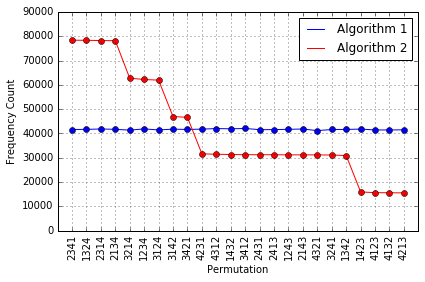

In [36]:
plt.figure(figsize=(6,4))

x = range(24)
plt.plot(x, count, 'b-', label='Algorithm 1')
plt.plot(x, count, 'bo')
plt.plot(x, count2, 'r-', label='Algorithm 2')
plt.plot(x, count2, 'ro')

plt.xticks(range(24), map(str,list(perm_sorted)), rotation=90)
plt.xlim(-1,24)
plt.ylim(0,90000)
plt.legend(loc='upper right')
plt.ylabel('Frequency Count')
plt.xlabel('Permutation')

plt.grid()
plt.tight_layout()